In [9]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import re

In [10]:
tennis = pd.read_csv('atp_data.csv')

In [11]:
tennis.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
1,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Kiefer N.,...,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
2,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Gaudio G.,...,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
3,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,El Aynaoui Y.,...,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
4,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Cherkasov A.,...,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5


In [12]:
tennis.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'Wsets',
       'Lsets', 'Comment', 'PSW', 'PSL', 'B365W', 'B365L', 'elo_winner',
       'elo_loser', 'proba_elo'],
      dtype='object')

1 - DATACLEANING 

In [13]:
tennis.columns = tennis.columns.str.lower()
tennis.columns = tennis.columns.str.replace(" ","_")


In [14]:
for col in tennis.columns:
    if tennis[col].dtype == 'object':
        tennis[col] = tennis[col].str.lower()
        tennis[col] = tennis[col].str.replace(" ","_")
        

In [15]:
tennis.head(5)

,atp,location,tournament,date,series,court,surface,round,best_of,winner,...,wsets,lsets,comment,psw,psl,b365w,b365l,elo_winner,elo_loser,proba_elo
0,1,adelaide,australian_hardcourt_championships,2000-01-03,international,outdoor,hard,1st_round,3,dosedel_s.,...,2.0,0.0,completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
1,3,doha,qatar_open,2000-01-03,international,outdoor,hard,1st_round,3,kiefer_n.,...,2.0,0.0,completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
2,3,doha,qatar_open,2000-01-03,international,outdoor,hard,1st_round,3,gaudio_g.,...,2.0,1.0,completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
3,3,doha,qatar_open,2000-01-03,international,outdoor,hard,1st_round,3,el_aynaoui_y.,...,2.0,1.0,completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
4,3,doha,qatar_open,2000-01-03,international,outdoor,hard,1st_round,3,cherkasov_a.,...,2.0,0.0,completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5


In [16]:
na_count = tennis.isna().sum(axis=0).sort_values(ascending = False) / len(tennis) * 100
na_count

psl           26.762548
psw           26.762548
b365w         12.684531
b365l         12.639796
lsets          0.418270
wsets          0.418270
atp            0.000000
lrank          0.000000
elo_loser      0.000000
elo_winner     0.000000
comment        0.000000
wrank          0.000000
location       0.000000
loser          0.000000
winner         0.000000
best_of        0.000000
round          0.000000
surface        0.000000
court          0.000000
series         0.000000
date           0.000000
tournament     0.000000
proba_elo      0.000000
dtype: float64

In [17]:
tennis.drop(columns = ['psw','psl','b365l','b365w'],inplace=True)

In [18]:
tennis.head()

,atp,location,tournament,date,series,court,surface,round,best_of,winner,loser,wrank,lrank,wsets,lsets,comment,elo_winner,elo_loser,proba_elo
0,1,adelaide,australian_hardcourt_championships,2000-01-03,international,outdoor,hard,1st_round,3,dosedel_s.,ljubicic_i.,63,77,2.0,0.0,completed,1500.0,1500.0,0.5
1,3,doha,qatar_open,2000-01-03,international,outdoor,hard,1st_round,3,kiefer_n.,tarango_j.,6,59,2.0,0.0,completed,1500.0,1500.0,0.5
2,3,doha,qatar_open,2000-01-03,international,outdoor,hard,1st_round,3,gaudio_g.,luxa_p.,73,174,2.0,1.0,completed,1500.0,1500.0,0.5
3,3,doha,qatar_open,2000-01-03,international,outdoor,hard,1st_round,3,el_aynaoui_y.,dupuis_a.,33,78,2.0,1.0,completed,1500.0,1500.0,0.5
4,3,doha,qatar_open,2000-01-03,international,outdoor,hard,1st_round,3,cherkasov_a.,arazi_h.,206,35,2.0,0.0,completed,1500.0,1500.0,0.5


In [19]:
tennis.dropna(inplace=True)

In [20]:
tennis.shape

(44520, 19)

In [21]:
locations = tennis.location.unique()
len(locations)

115

In [22]:
tennis.drop_duplicates(keep = 'first',inplace=True)

In [23]:
tennis.shape

(44520, 19)

In [24]:
tennis['date'] = pd.to_datetime(tennis['date'],format="%Y-%m-%d")

# Figures

# Q How Many Player's name ends with 'vic'

It may sound funny but may be there is some patterns between the name and performance and the team they are playing for

In [43]:
tennis['lname1'] = tennis['winner'].str.extract(r'\w+(vic)_\w')
tennis['lname2'] = tennis['loser'].str.extract(r'\w+(vic)_\w')

l_vic = tennis.loc[(tennis['lname1'] == 'vic')]
l_vic['winner'].unique()

array(['petrovic_d.', 'ivanisevic_g.', 'karlovic_i.', 'dancevic_f.',
       'bogdanovic_a.', 'tipsarevic_j.', 'djokovic_n.', 'eleskovic_e.',
       'djokovic_n._', 'tipsarevic_j._', 'matosevic_m.', 'krajinovic_f.',
       'lajovic_d.', 'pavic_m.', 'pavic_a.'], dtype=object)

In [17]:
series_df = tennis['series'].value_counts()
series_df

international         10755
atp250                 9506
grand_slam             8235
masters                4603
masters_1000           4489
atp500                 3405
international_gold     3287
masters_cup             240
Name: series, dtype: int64

In [19]:
types_of_court = tennis['court'].value_counts()
types_of_court.reset_index()

,index,court
0,outdoor,36384
1,indoor,8136


# Q) Which was the most busiest tournament month 

In [20]:
month_match = tennis.date.dt.month.value_counts()
month_match = pd.DataFrame(data = month_match)
month_match.reset_index(inplace=True)
month_match.columns= ['month','count']
month_match.sort_values(by='month',inplace=True)
month_match.reset_index(inplace=True)
month_match.drop(['index'],axis=1,inplace=True)

In [23]:
monthcal = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [24]:
month_match['month'] = month_match.month.apply(lambda x: monthcal[x] if x in monthcal.keys() else x)

<AxesSubplot:xlabel='month', ylabel='count'>

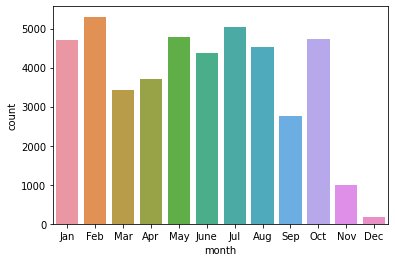

In [25]:
#match played in particular month
sns.barplot(x ='month',y='count',data=month_match.head(15))

In [26]:
locations = tennis['location'].value_counts().reset_index()
locations

,index,location
0,paris,2770
1,london,2177
2,melbourne,2156
3,new_york,2055
4,miami,1511
...,...,...
110,budapest,27
111,oeiras,27
112,antalya,27
113,dusseldorf,26


In [27]:
#match played in top cities

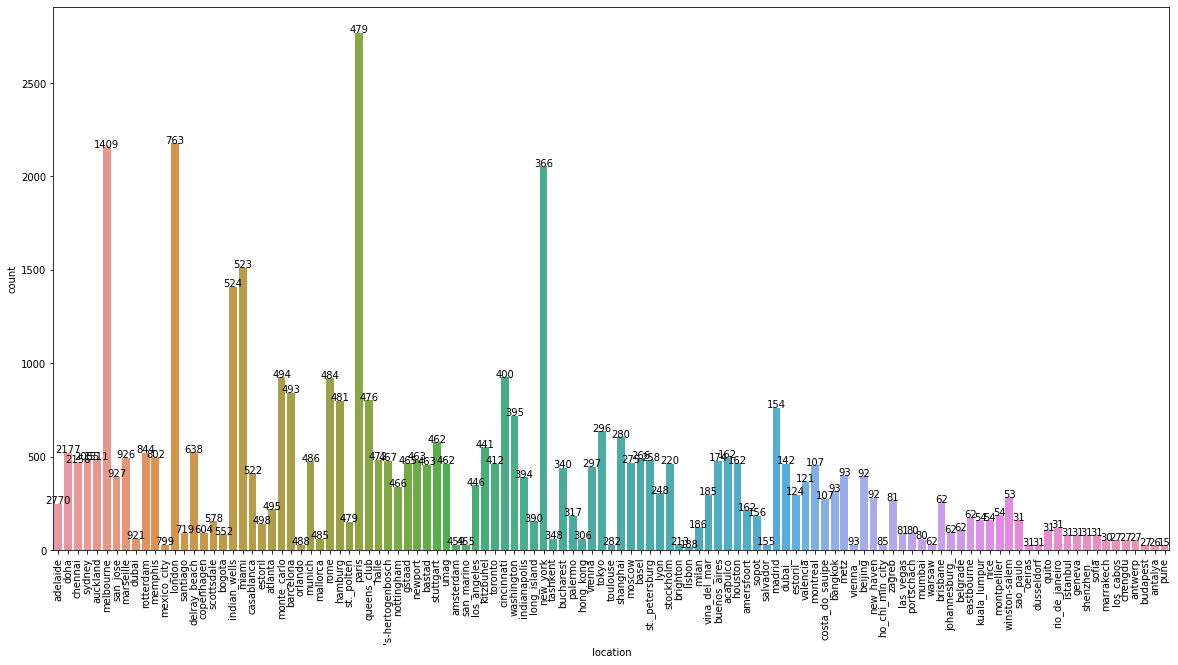

In [28]:
#to create a blank white frame
fig, ax1 = plt.subplots(figsize=(20,10))

graph = sns.countplot(ax=ax1,x='location',data=tennis)

graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2.,height + 0.1,tennis['location'].value_counts()[i],ha='center')
    i+=1

# Q) Find out the city that hosted most number of matches

<AxesSubplot:xlabel='location', ylabel='index'>

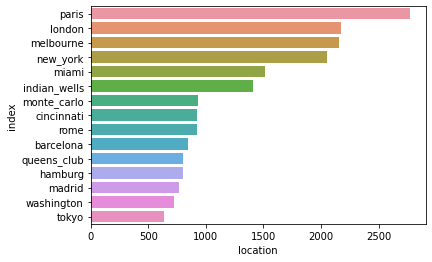

In [29]:
sns.barplot(x = 'location',y = 'index',data = locations.head(15))

In [30]:
location_gb = tennis.groupby('location')

In [32]:
temp_location = tennis.groupby('location')[['tournament']]

In [33]:
winners = tennis.winner.value_counts().reset_index()
winners

,index,winner
0,federer_r.,963
1,nadal_r.,796
2,djokovic_n.,680
3,ferrer_d.,627
4,murray_a.,552
...,...,...
888,mertl_j.,1
889,slanar_m.,1
890,gomez_e.,1
891,hernych_j._,1


In [34]:
losers = tennis.loser.value_counts().reset_index()
losers

,index,loser
0,lopez_f.,367
1,youzhny_m.,339
2,verdasco_f.,338
3,ferrer_d.,324
4,nieminen_j.,306
...,...,...
1385,smith_a.,1
1386,quiroz_r.,1
1387,andreev_a.,1
1388,do_m.q.,1


# Q) Find out top five player who played most number of matches

In [35]:
# Total match played by a player
players = pd.merge(winners,losers,how='inner',on='index')
players

,index,winner,loser
0,federer_r.,963,188
1,nadal_r.,796,171
2,djokovic_n.,680,145
3,ferrer_d.,627,324
4,murray_a.,552,161
...,...,...,...
885,mertl_j.,1,1
886,slanar_m.,1,2
887,gomez_e.,1,3
888,hernych_j._,1,1


In [36]:
players['total_match'] = players['winner'] + players['loser']
players

,index,winner,loser,total_match
0,federer_r.,963,188,1151
1,nadal_r.,796,171,967
2,djokovic_n.,680,145,825
3,ferrer_d.,627,324,951
4,murray_a.,552,161,713
...,...,...,...,...
885,mertl_j.,1,1,2
886,slanar_m.,1,2,3
887,gomez_e.,1,3,4
888,hernych_j._,1,1,2


<AxesSubplot:xlabel='total_match', ylabel='index'>

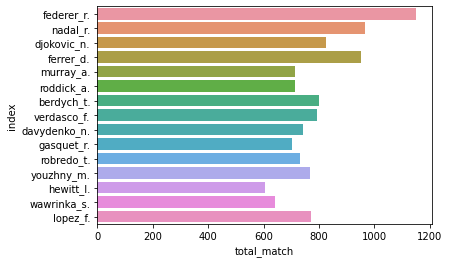

In [37]:
#plot of match played by top 15 players
sns.barplot(x = 'total_match',y='index',data = players.head(15))

In [38]:
players['percent_win'] = players['winner']/players['total_match'] *100
players

,index,winner,loser,total_match,percent_win
0,federer_r.,963,188,1151,83.666377
1,nadal_r.,796,171,967,82.316443
2,djokovic_n.,680,145,825,82.424242
3,ferrer_d.,627,324,951,65.930599
4,murray_a.,552,161,713,77.419355
...,...,...,...,...,...
885,mertl_j.,1,1,2,50.000000
886,slanar_m.,1,2,3,33.333333
887,gomez_e.,1,3,4,25.000000
888,hernych_j._,1,1,2,50.000000


<AxesSubplot:xlabel='percent_win', ylabel='index'>

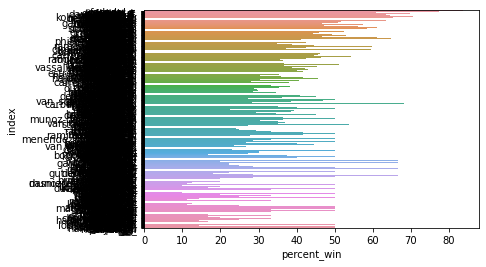

In [39]:
#winnig percentage
sns.barplot(x='percent_win',y='index',data=players)

# Q)List out players won most number of mathces percentagewise

<AxesSubplot:xlabel='percent_win', ylabel='index'>

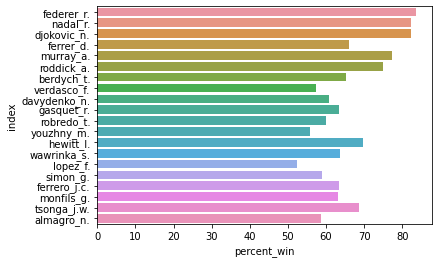

In [40]:
#winnig percentage
sns.barplot(x='percent_win',y='index',data=players.head(20))

In [114]:
tennis.loc[(tennis['tournament'] == 'french_open') & (tennis['winner'] == 'federer_r.')]

,atp,location,tournament,date,series,court,surface,round,best_of,winner,loser,wrank,lrank,wsets,lsets,comment,elo_winner,elo_loser,proba_elo
1310,32,paris,french_open,2000-05-29,grand_slam,outdoor,clay,2nd_round,5,federer_r.,gambill_j.m.,54,69,3.0,0.0,completed,1493.088537,1513.040240,0.471319
1347,32,paris,french_open,2000-05-29,grand_slam,outdoor,clay,3rd_round,5,federer_r.,kratochvil_m.,54,120,3.0,2.0,completed,1500.065991,1516.968164,0.475695
1363,32,paris,french_open,2000-05-29,grand_slam,outdoor,clay,1st_round,5,federer_r.,arthurs_w.,54,106,3.0,1.0,completed,1516.843751,1442.037604,0.606021
9983,30,paris,french_open,2004-05-25,grand_slam,outdoor,clay,1st_round,5,federer_r.,vliegen_k.,1,110,3.0,0.0,completed,2036.552672,1567.706813,0.936961
10010,30,paris,french_open,2004-05-27,grand_slam,outdoor,clay,2nd_round,5,federer_r.,kiefer_n.,1,34,3.0,0.0,completed,2038.569910,1648.811255,0.904100
12859,31,paris,french_open,2005-05-23,grand_slam,outdoor,clay,1st_round,5,federer_r.,sela_d.,1,264,3.0,0.0,completed,2190.251011,1500.000000,0.981538
12896,31,paris,french_open,2005-05-25,grand_slam,outdoor,clay,2nd_round,5,federer_r.,almagro_n.,1,76,3.0,0.0,completed,2190.841796,1498.308227,0.981775
12932,31,paris,french_open,2005-05-27,grand_slam,outdoor,clay,3rd_round,5,federer_r.,gonzalez_f.,1,26,3.0,0.0,completed,2191.425010,1722.327657,0.937047
12940,31,paris,french_open,2005-05-29,grand_slam,outdoor,clay,4th_round,5,federer_r.,moya_c.,1,15,3.0,0.0,completed,2193.439512,1749.368430,0.927994
12949,31,paris,french_open,2005-05-31,grand_slam,outdoor,clay,quarterfinals,5,federer_r.,hanescu_v.,1,90,3.0,0.0,completed,2195.743698,1609.884293,0.966833


In [42]:
tennis.groupby('location')[['winner']].count()

,winner
location,
's-hertogenbosch,479
acapulco,495
adelaide,248
amersfoort,213
amsterdam,31
...,...
vina_del_mar,296
warsaw,31
washington,719


# Q) TOURNAMENTS DATA ANALYSIS BY CREATING NEW DATAFRAME


In [43]:
tennis.series.value_counts()

international         10755
atp250                 9506
grand_slam             8235
masters                4603
masters_1000           4489
atp500                 3405
international_gold     3287
masters_cup             240
Name: series, dtype: int64

In [44]:
tournaments = pd.DataFrame()

In [45]:
series_temp = list(tennis.series.unique())

In [46]:
tournaments['player'] = tennis.winner.unique()

In [47]:
tournaments

,player
0,dosedel_s.
1,kiefer_n.
2,gaudio_g.
3,el_aynaoui_y.
4,cherkasov_a.
...,...
888,moutet_c.
889,taberner_c.
890,quiroz_r.
891,griekspoor_t.


In [48]:
#df = df.reindex(columns=['mean',0,1,2,3,4])
tournaments.reindex(columns = series_temp)

,international,grand_slam,international_gold,masters,masters_cup,atp250,atp500,masters_1000
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
tournaments[series_temp] = np.nan

In [50]:
tournaments.set_index('player',inplace=True)

In [51]:
tempk = tennis[tennis['winner'] == 'federer_r.']['series'].value_counts()
tempk

grand_slam            301
masters               170
masters_1000          144
international         123
atp500                 73
international_gold     57
masters_cup            51
atp250                 44
Name: series, dtype: int64

In [52]:
tournaments.loc['dosedel_s.'] = tempk

In [53]:
tournaments.loc['dosedel_s.']

international         123.0
grand_slam            301.0
international_gold     57.0
masters               170.0
masters_cup            51.0
atp250                 44.0
atp500                 73.0
masters_1000          144.0
Name: dosedel_s., dtype: float64

In [54]:
tournaments.head()

,international,grand_slam,international_gold,masters,masters_cup,atp250,atp500,masters_1000
player,,,,,,,,
dosedel_s.,123.0,301.0,57.0,170.0,51.0,44.0,73.0,144.0
kiefer_n.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gaudio_g.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
el_aynaoui_y.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cherkasov_a.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
player_list = list(tennis['winner'])
player_list.head(3)

['dosedel_s.',
 'kiefer_n.',
 'gaudio_g.',
 'el_aynaoui_y.',
 'cherkasov_a.',
 'caratti_c.',
 'berasategui_a.',
 'bastl_g.',
 'hantschk_m.',
 'golmard_j.',
 'pioline_c.',
 'hantschk_m.',
 'golmard_j.',
 'damm_m.',
 'sanguinetti_d.',
 'pioline_c.',
 'manta_l.',
 'ketola_t.',
 'hantschk_m.',
 'golmard_j.',
 'marin_j.a.',
 'mirnyi_m.',
 'santoro_f.',
 'schalken_s.',
 'santoro_f.',
 'schuettler_r.',
 'santoro_f.',
 'schuettler_r.',
 'santoro_f.',
 'kiefer_n.',
 'el_aynaoui_y.',
 'tillstrom_m.',
 'schuettler_r.',
 'delgado_j.',
 'schalken_s.',
 'mirnyi_m.',
 'kiefer_n.',
 'el_aynaoui_y.',
 'bastl_g.',
 'van_lottum_j.',
 'vacek_d.',
 'tillstrom_m.',
 'squillari_f.',
 'schuettler_r.',
 'santoro_f.',
 'damm_m.',
 'golmard_j.',
 'vanek_j.',
 'hewitt_l.',
 'henman_t.',
 'grosjean_s.',
 'escude_n.',
 'enqvist_t.',
 'vinck_c.',
 'stoltenberg_j.',
 'sekulov_j.',
 'petrovic_d.',
 'martin_a.',
 'norman_m.',
 'lisnard_j.',
 'vinciguerra_a.',
 'henman_t.',
 'grosjean_s.',
 'gambill_j.m.',
 'fromberg_r.

In [56]:
for p in player_list:
    temp_p = tennis[tennis['winner'] == p]['series'].value_counts()
    tournaments.loc[p] = temp_p


In [57]:
tournaments.head()

,international,grand_slam,international_gold,masters,masters_cup,atp250,atp500,masters_1000
player,,,,,,,,
dosedel_s.,4.0,6.0,2.0,5.0,NaN,NaN,NaN,NaN
kiefer_n.,83.0,38.0,18.0,47.0,NaN,9.0,NaN,2.0
gaudio_g.,76.0,34.0,55.0,53.0,2.0,NaN,1.0,NaN
el_aynaoui_y.,61.0,28.0,17.0,19.0,NaN,1.0,NaN,NaN
cherkasov_a.,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
tournaments.fillna(0,inplace=True)

In [60]:
tournaments['total'] = tournaments.sum(axis=1,)

In [61]:
tournaments.drop(columns=['total'],inplace=True)

In [62]:
tournaments['total'] = tournaments.sum(axis=1,)

In [63]:
tournaments.sort_values(by='total',ascending=False,inplace=True)

In [64]:
tournaments.reset_index(inplace=True)
tournaments.head(2)

,player,international,grand_slam,international_gold,masters,masters_cup,atp250,atp500,masters_1000,total
0,federer_r.,123.0,301.0,57.0,170.0,51.0,44.0,73.0,144.0,963.0
1,nadal_r.,66.0,214.0,45.0,124.0,16.0,42.0,84.0,205.0,796.0
2,djokovic_n.,41.0,218.0,16.0,56.0,27.0,34.0,64.0,224.0,680.0
3,ferrer_d.,82.0,135.0,41.0,63.0,8.0,102.0,95.0,101.0,627.0
4,murray_a.,58.0,171.0,12.0,48.0,15.0,44.0,55.0,149.0,552.0
...,...,...,...,...,...,...,...,...,...,...
888,lammer_m._,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
889,hernych_j._,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
890,monfils_g._,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
891,cuevas_p._,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [120]:
top_players = tournaments.head(15)
top_players.head(2)

,player,international,grand_slam,international_gold,masters,masters_cup,atp250,atp500,masters_1000,total
0,federer_r.,123.0,301.0,57.0,170.0,51.0,44.0,73.0,144.0,963.0
1,nadal_r.,66.0,214.0,45.0,124.0,16.0,42.0,84.0,205.0,796.0
2,djokovic_n.,41.0,218.0,16.0,56.0,27.0,34.0,64.0,224.0,680.0
3,ferrer_d.,82.0,135.0,41.0,63.0,8.0,102.0,95.0,101.0,627.0
4,murray_a.,58.0,171.0,12.0,48.0,15.0,44.0,55.0,149.0,552.0
5,roddick_a.,135.0,123.0,52.0,111.0,8.0,50.0,19.0,38.0,536.0
6,berdych_t.,48.0,128.0,26.0,47.0,5.0,85.0,54.0,128.0,521.0
7,verdasco_f.,68.0,94.0,42.0,37.0,0.0,97.0,45.0,71.0,454.0
8,davydenko_n.,123.0,79.0,44.0,67.0,12.0,55.0,36.0,35.0,451.0
9,gasquet_r.,74.0,94.0,12.0,41.0,1.0,109.0,40.0,76.0,447.0


# Q) Can you find a pattern in Number of Match played by the top players

In [88]:
tournaments.shape

(893, 10)

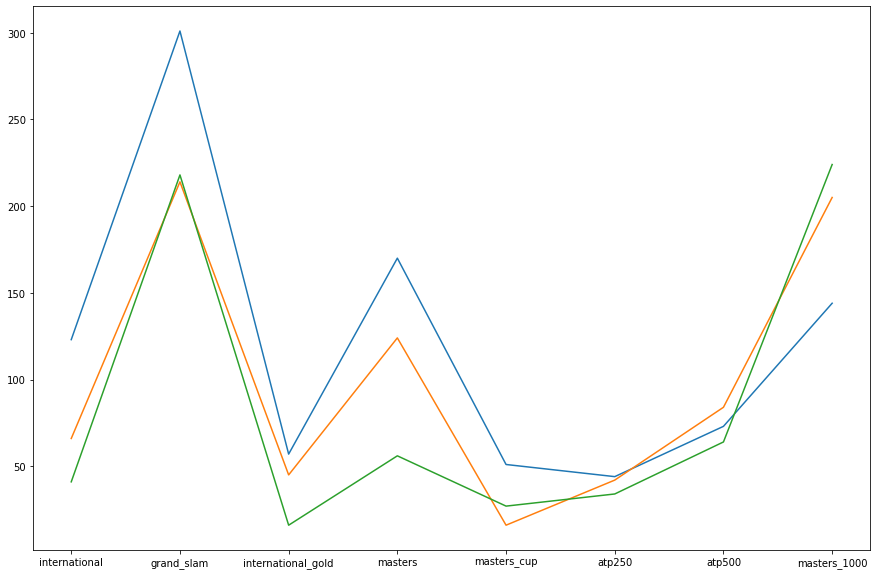

In [109]:
figure(figsize=(15,10))
plt.plot(tournaments.columns[1:9],list(tournaments.iloc[0])[1:9])
plt.plot(tournaments.columns[1:9],list(tournaments.iloc[1])[1:9])
plt.plot(tournaments.columns[1:9],list(tournaments.iloc[2])[1:9])

<ipython-input-113-db4ff8810156>:8: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000288FFE70700> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(legend_name[i])
<ipython-input-113-db4ff8810156>:8: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000288FFE70700> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(legend_name[i])
<ipython-input-113-db4ff8810156>:8: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000288FFE70700> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(legend_name[i])
<ipython-input-113-db4ff8810156>:8: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000288FE1CE8E0> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(legend_name[i])
<ipython-input-113-db4ff8810156>:8: UserWarning: The handle <matplotlib.lines.Line2D object at 0x00000288FABAF610> has a label of '_' which cann

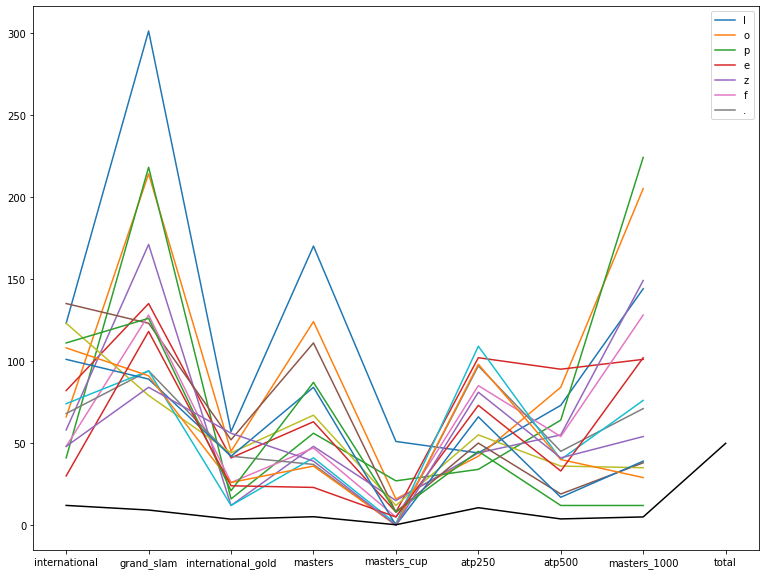

In [113]:
figure(figsize=(13,10))
legend_name=[]
for i in range(15):
    legend_name.append(tournaments.iloc[i].player)
    
for i in range(15):
    plt.plot(tournaments.columns[1:9],list(tournaments.iloc[i])[1:9])
    plt.legend(legend_name[i])


plt.plot(tournaments.describe().iloc[1],color='black')
plt.show()


In [96]:
for i in range(15):
    print(tournaments.iloc[i].player)

federer_r.
nadal_r.
djokovic_n.
ferrer_d.
murray_a.
roddick_a.
berdych_t.
verdasco_f.
davydenko_n.
gasquet_r.
robredo_t.
youzhny_m.
hewitt_l.
wawrinka_s.
lopez_f.


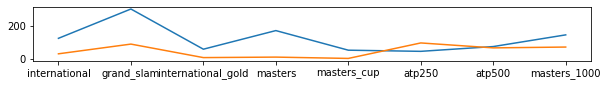

In [89]:
figure(figsize=(10,1))
plt.plot(tournaments.columns[1:9],list(tournaments.iloc[0])[1:9])
plt.plot(tournaments.columns[1:9],list(tournaments.iloc[20])[1:9])


In [101]:
tournaments.describe()

,international,grand_slam,international_gold,masters,masters_cup,atp250,atp500,masters_1000,total
count,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000,893.000000
mean,12.043673,9.221725,3.680851,5.154535,0.268757,10.645017,3.812990,5.026876,49.854423
std,23.690864,23.278199,8.478676,15.461970,2.233936,21.636325,10.289845,17.746829,99.490964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8.000000
75%,11.000000,7.000000,3.000000,1.000000,0.000000,8.000000,2.000000,1.000000,47.000000
max,144.000000,301.000000,57.000000,170.000000,51.000000,123.000000,95.000000,224.000000,963.000000


In [103]:
tournaments.describe().iloc[1]

international         12.043673
grand_slam             9.221725
international_gold     3.680851
masters                5.154535
masters_cup            0.268757
atp250                10.645017
atp500                 3.812990
masters_1000           5.026876
total                 49.854423
Name: mean, dtype: float64

In [122]:
top_players

,player,international,grand_slam,international_gold,masters,masters_cup,atp250,atp500,masters_1000,total
0,federer_r.,123.0,301.0,57.0,170.0,51.0,44.0,73.0,144.0,963.0
1,nadal_r.,66.0,214.0,45.0,124.0,16.0,42.0,84.0,205.0,796.0
2,djokovic_n.,41.0,218.0,16.0,56.0,27.0,34.0,64.0,224.0,680.0
3,ferrer_d.,82.0,135.0,41.0,63.0,8.0,102.0,95.0,101.0,627.0
4,murray_a.,58.0,171.0,12.0,48.0,15.0,44.0,55.0,149.0,552.0
5,roddick_a.,135.0,123.0,52.0,111.0,8.0,50.0,19.0,38.0,536.0
6,berdych_t.,48.0,128.0,26.0,47.0,5.0,85.0,54.0,128.0,521.0
7,verdasco_f.,68.0,94.0,42.0,37.0,0.0,97.0,45.0,71.0,454.0
8,davydenko_n.,123.0,79.0,44.0,67.0,12.0,55.0,36.0,35.0,451.0
9,gasquet_r.,74.0,94.0,12.0,41.0,1.0,109.0,40.0,76.0,447.0


<Figure size 936x3600 with 0 Axes>

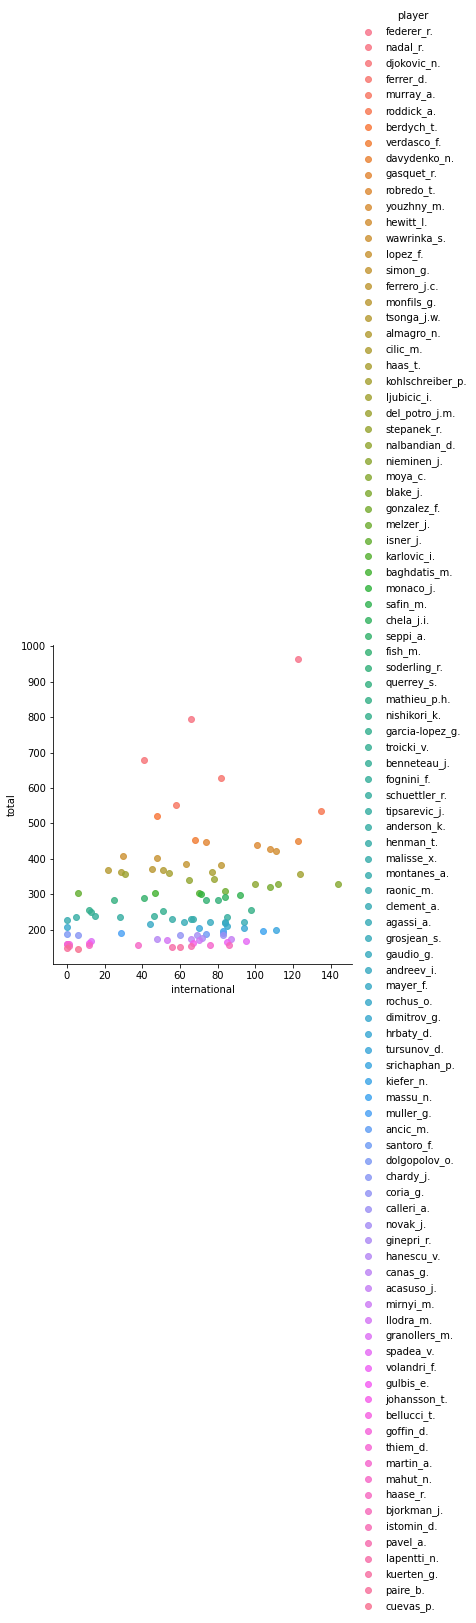

In [130]:
# internation match compared to total match
figure(figsize=(13,50))
sns.lmplot(x='international',y='total',data=tournaments.head(100),fit_reg=False,hue='player')

<AxesSubplot:>

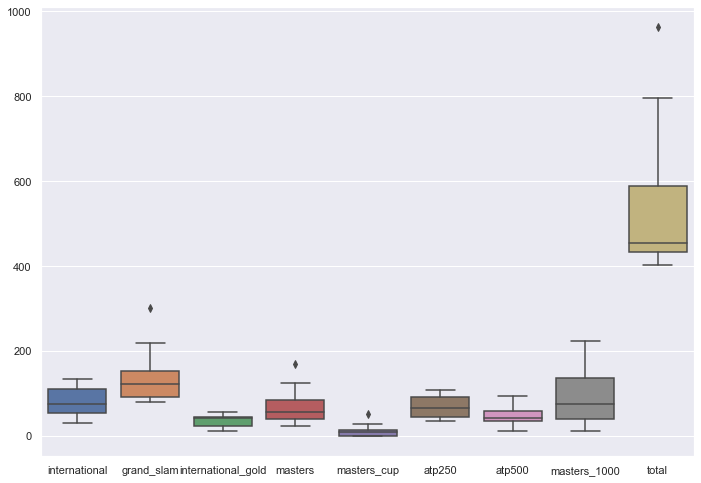

In [132]:
#THIS GRAPH MAKES NO SENSE
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=top_players)